In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('scholarship.csv')
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [16]:
df1=df.copy()
df1

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [17]:
df1.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


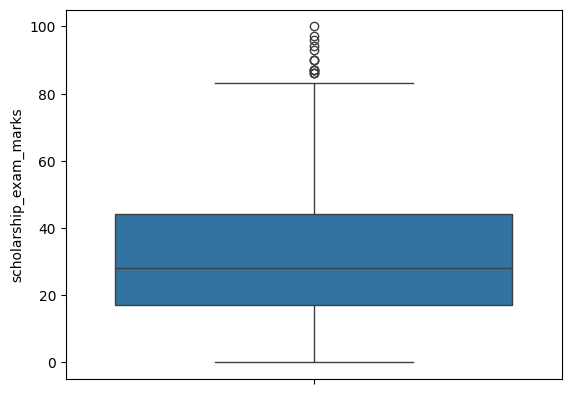

In [18]:
sns.boxplot(df1['scholarship_exam_marks'])
plt.show()

C:\Users\afroz\AppData\Local\Temp\ipykernel_13972\2871164955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['scholarship_exam_marks'])


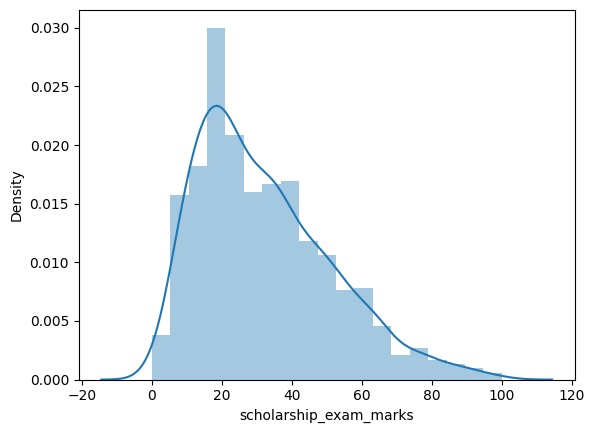

In [19]:
sns.distplot(df1['scholarship_exam_marks'])
plt.show()

# It is a Skew distribution

In [20]:
q1 = df1['scholarship_exam_marks'].quantile(0.25)
q3=df1['scholarship_exam_marks'].quantile(0.75)

In [21]:
print(q1,",",q3)

17.0 , 44.0


In [22]:
iqr=q3-q1

In [23]:
upper_bond=q3+1.5*iqr
lower_bond=q1-1.5*iqr

In [24]:
upper_bond,lower_bond

(np.float64(84.5), np.float64(-23.5))

In [25]:
df1=df.copy()

# This are Outliers

In [26]:
df1[(df1['scholarship_exam_marks']<lower_bond)|(df1['scholarship_exam_marks']>upper_bond)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


# Trimming

In [32]:
df1[(df1['scholarship_exam_marks']>=lower_bond)& (df1['scholarship_exam_marks']<=upper_bond)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


## In Trimming method 15 outliers are removed

# Capping Method

In [53]:
df2=df.copy()

In [54]:
df2['scholarship_exam_marks']=np.where(df2['scholarship_exam_marks'] > upper_bond,upper_bond,np.where(df2['scholarship_exam_marks'] < lower_bond,lower_bond,df2['scholarship_exam_marks']))

In [55]:
df2

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26.0,1
1,74.6,38.0,1
2,75.4,40.0,1
3,64.2,8.0,1
4,72.3,17.0,0
...,...,...,...
995,88.7,44.0,1
996,91.2,65.0,1
997,48.9,34.0,0
998,86.2,46.0,1


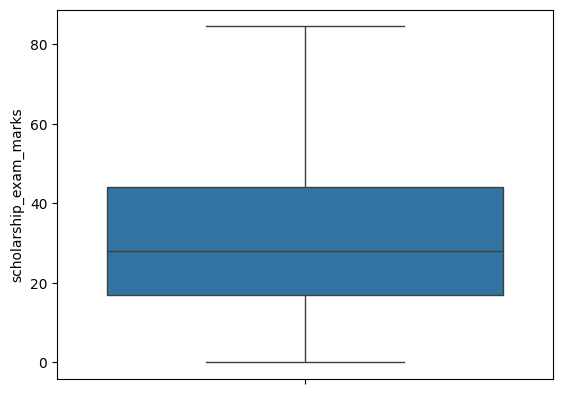

In [42]:
sns.boxplot(df2['scholarship_exam_marks'])
plt.show()

C:\Users\afroz\AppData\Local\Temp\ipykernel_13972\3749183085.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])
C:\Users\afroz\AppData\Local\Temp\ipykernel_13972\3749183085.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['scholarship_exam_marks'])


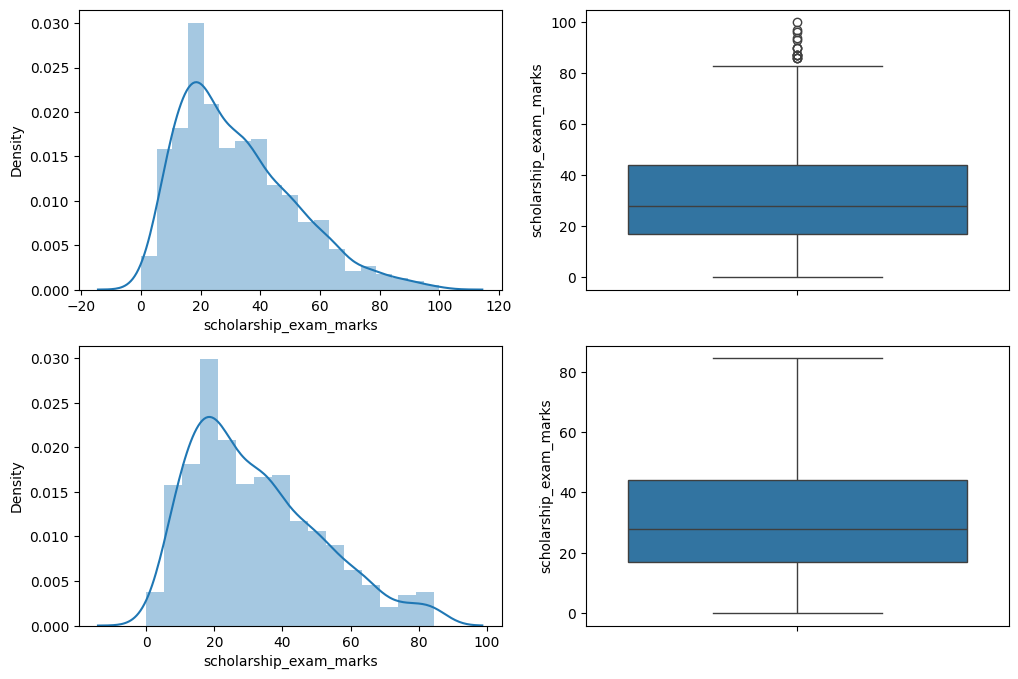

In [56]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.distplot(df['scholarship_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['scholarship_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df2['scholarship_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df2['scholarship_exam_marks'])

plt.show()